In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [105]:
# load binned displacement data 
EMC_disp = pd.read_csv('MCMC_inputs/Mean_displacement_decays/EMC_all_displacements_binned.csv',delimiter=',')
Landers_disp = pd.read_csv('MCMC_inputs/Mean_displacement_decays/Landers_all_displacements_binned.csv',delimiter=',')
HectorMine_disp = pd.read_csv('MCMC_inputs/Mean_displacement_decays/HectorMine_all_displacements_binned.csv',delimiter=',')
Ridgecrest1_disp = pd.read_csv('MCMC_inputs/Mean_displacement_decays/Ridgecrest1_all_displacements_binned.csv',delimiter=',')
Ridgecrest2_disp = pd.read_csv('MCMC_inputs/Mean_displacement_decays/Ridgecrest2_all_displacements_binned.csv',delimiter=',')

In [106]:
def bin_data_nearfield(df):
    mask = (df['x'] >= 6) & (df['x'] <= 8)
    filtered_df = df[mask]
    return filtered_df

In [107]:
EMC_disp_68 = bin_data_nearfield(EMC_disp)
Ridgecrest1_disp_68 = bin_data_nearfield(Ridgecrest1_disp)
Ridgecrest2_disp_68 = bin_data_nearfield(Ridgecrest2_disp)
Landers_disp_68 = bin_data_nearfield(Landers_disp)
HectorMine_disp_68 = bin_data_nearfield(HectorMine_disp)


In [108]:
def fit_cdfs(df,col,axes,title):
    disp_values = df['disp'].values
    sorted_disp = np.sort(disp_values)
    sns.ecdfplot(data=disp_values, color=col,ax=axes)
    axes.set_xlabel('Displacement (m)')
    axes.set_ylabel('Cumulative probability')

    disp_values = df['disp'].values
    x = np.linspace(np.min(disp_values), np.max(disp_values), 100)

    # The following fits are generated using chatGPT:
    # Fit a log-normal distribution
    lognormal_params = stats.lognorm.fit(sorted_disp)
    lognormal_dist = stats.lognorm(*lognormal_params)
    lognormal_cdf = lognormal_dist.cdf(x)

    # Fit a uniform distribution
    uniform_params = stats.uniform.fit(sorted_disp)
    uniform_dist = stats.uniform(*uniform_params)
    uniform_cdf = uniform_dist.cdf(x)

    # Fit an exponential distribution
    exponential_params = stats.expon.fit(sorted_disp)
    exponential_dist = stats.expon(*exponential_params)
    exponential_cdf = exponential_dist.cdf(x)

    axes.plot(x, lognormal_cdf, linestyle='--',color='slategrey', label='Log-normal')
    axes.plot(x, uniform_cdf,linestyle=':', color='slategrey', label='Uniform')
    axes.plot(x, exponential_cdf, linestyle='-',color='slategrey', label='Exponential')
    axes.set_title(title)


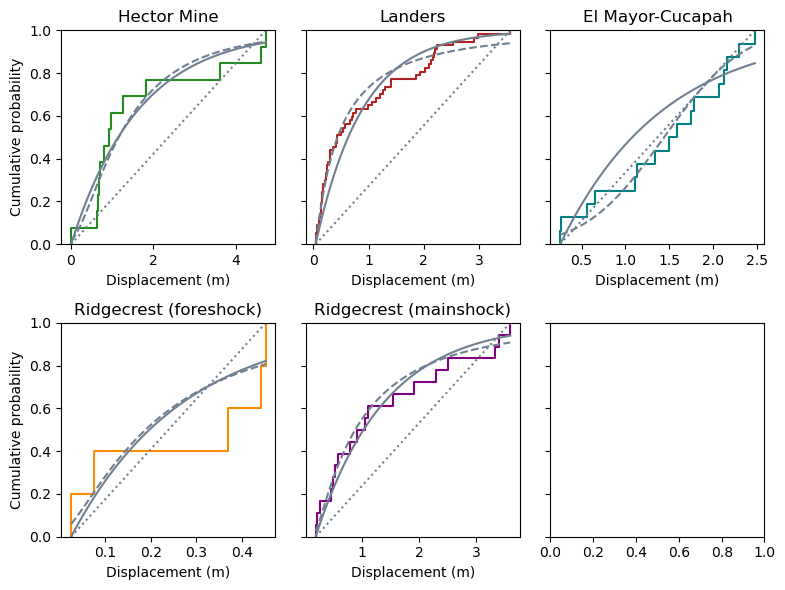

In [109]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),sharey=True)
fit_cdfs(EMC_disp_68,'teal',ax[0,2],'El Mayor-Cucapah')
fit_cdfs(Landers_disp_68,'firebrick',ax[0,1],'Landers')
fit_cdfs(HectorMine_disp_68,'forestgreen',ax[0,0],'Hector Mine')
fit_cdfs(Ridgecrest1_disp_68,'darkorange',ax[1,0],'Ridgecrest (foreshock)')
fit_cdfs(Ridgecrest2_disp_68,'purple',ax[1,1],'Ridgecrest (mainshock)')


plt.tight_layout()
plt.savefig('Model_outputs/bin_displacement_distributions_per_event.pdf',dpi=300)